# Task 1: Introduction


*  In this project, we have build different regression models to predict the chance of admission into a particular university based on the student’s profile.
*  INPUTS (features)

  o	GRE scores (out of 340)

  o	TOEFL Scores (out of 120)

  o	University rating (out of 5)

  o	Undergraduate GPA (out of 10)

  o	Statement of purpose( SOP)

  o	Letter of Recommendation (LOR) strength (out of 5)
  
  o	Research experience (either 0 or 1)

*   OUTPUTS (dependent variables)

    o	Chance of admission (ranging from 0 to 1)








# Task 2: Importing Libraries and the Datase

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
#read the dataset
admission_df = pd.read_csv('Admission_predict.csv')
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [36]:
#drop the column
admission_df.drop('Serial No.', axis= 1, inplace=True)
admission_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Task 3: Perform Exploratory data analysis

In [37]:
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [38]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [39]:
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [40]:
df_univ = admission_df.groupby(by  = 'University Rating').mean()
df_univ

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


# Task 4: Perform data visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ecee682e8>,
      dtype=object)

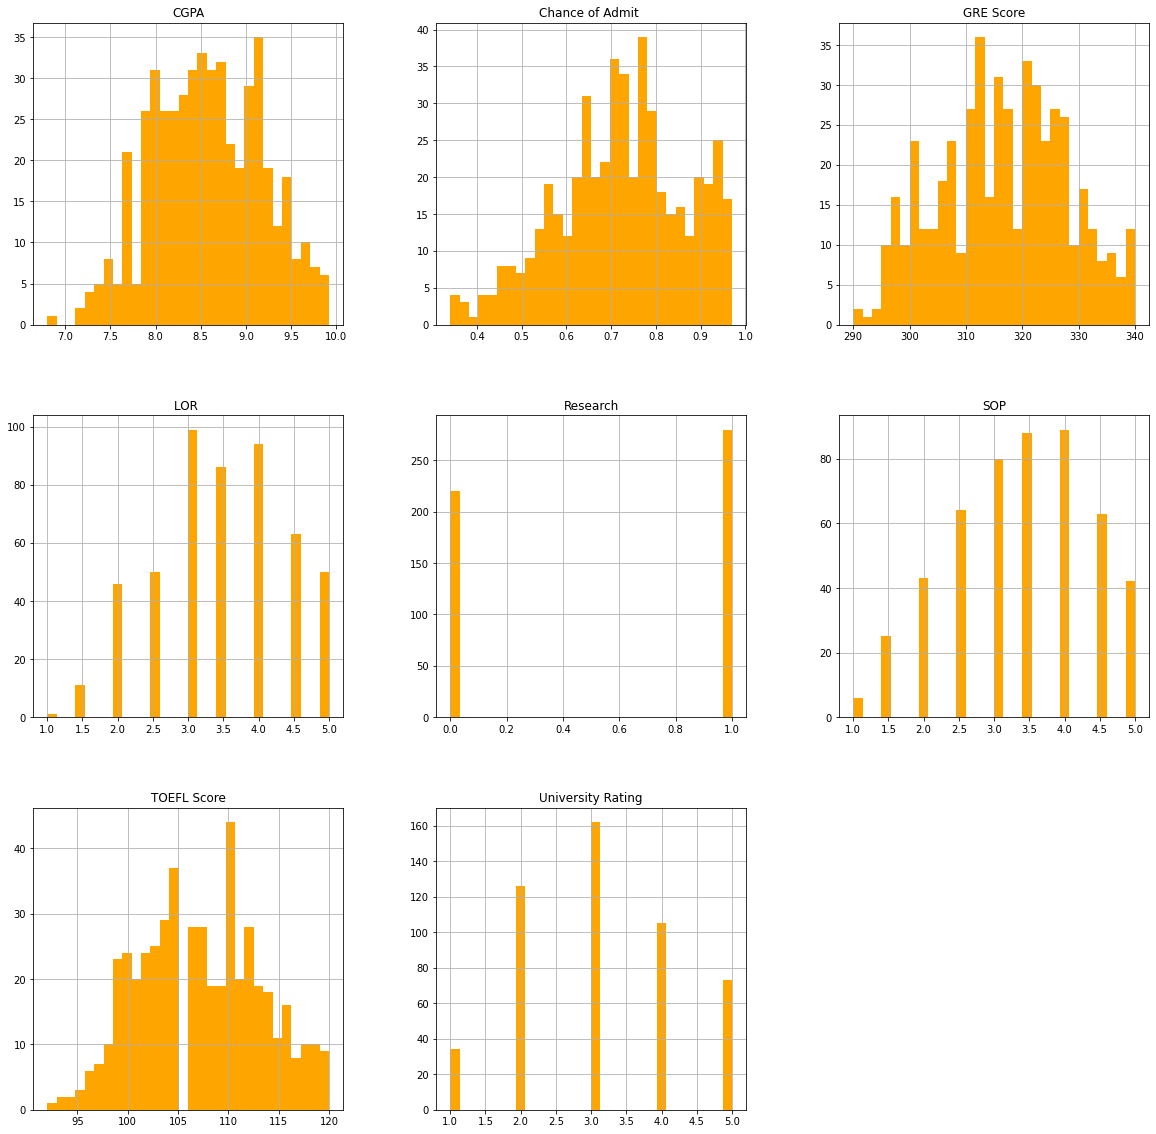

In [41]:
admission_df.hist(bins = 30, figsize=(20,20), color= 'orange')

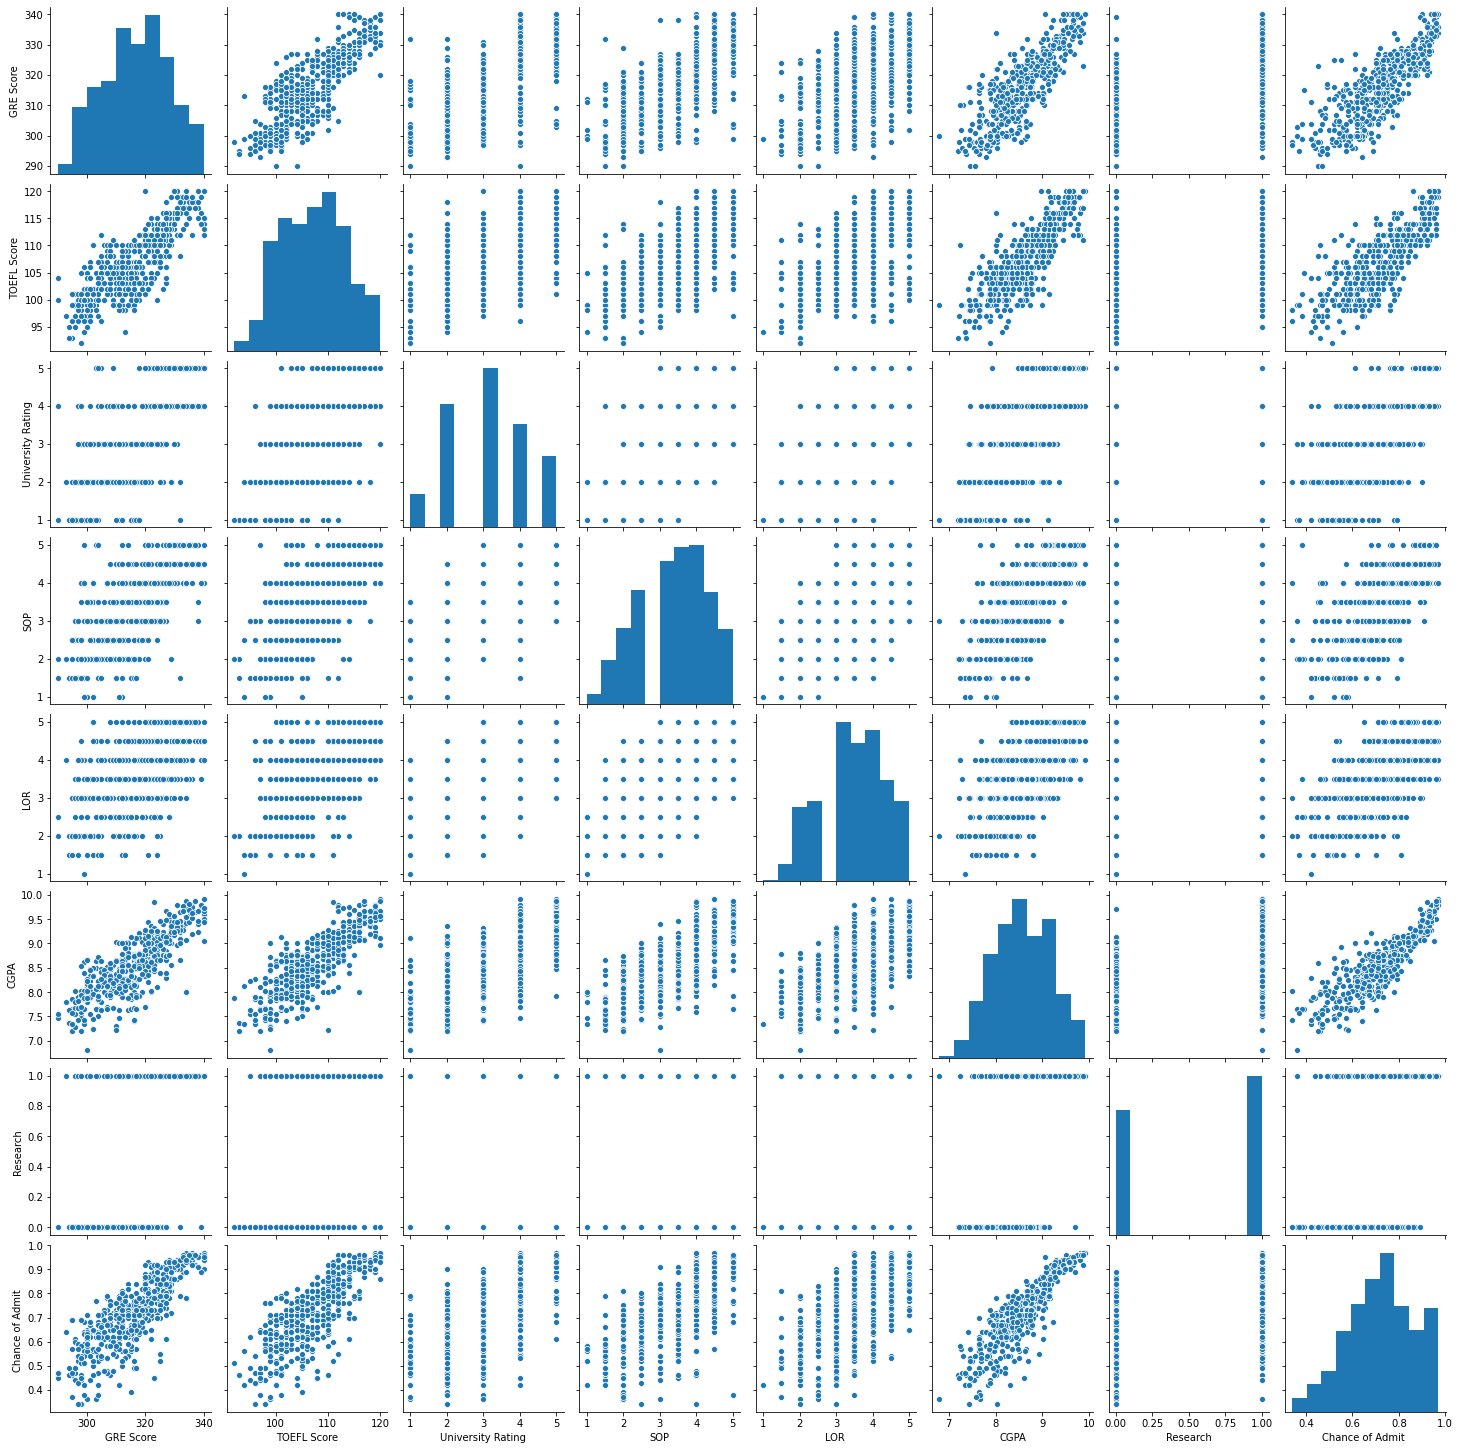

In [42]:
sns.pairplot(admission_df)

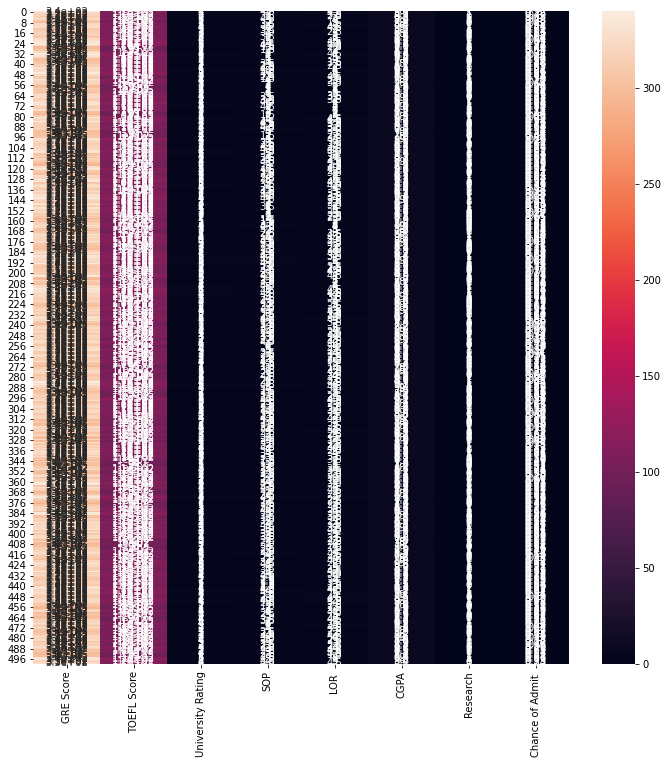

In [43]:
corr_matrix = admission_df
plt.figure(figsize= (12,12))
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Task 5: Create training and testing dataset 

In [44]:
#create the dependent and independent dataset
X=admission_df.iloc[:,:-1].values
y= admission_df.iloc[:,-1].values

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.15, random_state=0)

In [46]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Task 6: Train and evaluate a linear regression model

In [47]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
y_lin_pred = linear_reg.predict(X_test)

# Task 7: Train and Evaluate Decision Tress and Random Forest Models

In [49]:
from sklearn.tree import DecisionTreeRegressor
Decision_regressor = DecisionTreeRegressor(random_state = 0)
Decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [50]:
y_decision_pred = Decision_regressor.predict(X_test)

In [51]:
from sklearn.ensemble import RandomForestRegressor
Forest_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
Forest_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [52]:
y_forest_pred = Forest_regressor.predict(X_test)


# Task 8: Train and evaluate an Artificial Neural Network (ANN)

In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [54]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim=7))
ANN_model.add(Activation('relu'))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))


ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                400       
_________________________________________________________________
activation_4 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_5 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_6 (Activation)    (None, 150)              

In [55]:
ANN_model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [56]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20)

Epoch 1/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1981
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0750
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0494
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0337
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0251
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0237
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0166
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0157
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 10/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 11/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 12/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 13/100
22/22 [=================

In [57]:
y_ann_pred = ANN_model.predict(X_test)
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

3/3 [==============================] - 0s 2ms/step - loss: 0.0057
Accuracy : 0.9942618613131344


In [58]:
epochs_hist.history.keys()

dict_keys(['loss'])

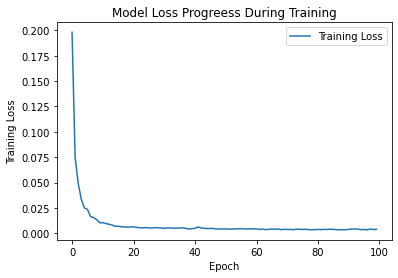

In [59]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progreess During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

# Task 9: Checking the Score of Regressors

In [60]:
from sklearn.metrics import accuracy_score
acc_lin = linear_reg.score(X_test, y_test)
print("Liner Accuracy : {}".format(acc_lin))

Liner Accuracy : 0.7631840156233377


In [61]:
acc_decision = Decision_regressor.score(X_test, y_test)
print("Accuracy : {}".format(acc_decision))

Accuracy : 0.638625003982481


In [62]:
acc_forest = Forest_regressor.score(X_test, y_test)
print("Accuracy : {}".format(acc_forest))

Accuracy : 0.768393738977899


In [63]:
acc_ANN = 1 - ANN_model.evaluate(X_test, y_test)
print("Accuracy : {}".format(acc_ANN))

3/3 [==============================] - 0s 2ms/step - loss: 0.0057
Accuracy : 0.9942618613131344


# Plotting the plots


Text(0.5, 1.0, 'ANN plot')

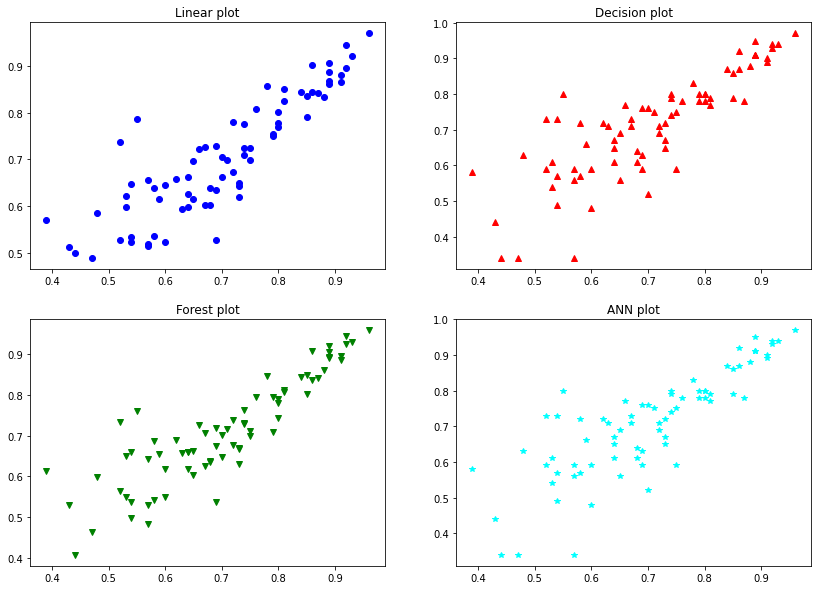

In [64]:
plt.figure(figsize= (14,10))
#y_test on x axis
#y_pred on y axis
plt.subplot(221)
plt.plot(y_test, y_lin_pred,'o', color = 'b')
plt.title('Linear plot')

plt.subplot(222)
plt.plot(y_test, y_decision_pred, '^', color = 'r')
plt.title('Decision plot')

plt.subplot(223)
plt.plot(y_test, y_forest_pred, 'v', color = 'g')
plt.title('Forest plot')

plt.subplot(224)
plt.plot(y_test, y_decision_pred, '*', color = 'aqua')
plt.title('ANN plot')


# Calculate Regression Model KPIs

Model performance metrics

   In regression model, the most commonly known evaluation metrics include:

   * **R-squared (R2)**, which is the proportion of variation in the outcome that is explained by the predictor variables. 
    
    It provides an indication of Goodness Of Fit.
         In multiple regression models, R2 corresponds to the squared correlation between the observed and the predicted values by the model. 
          The Higher the R-squared, the better the model.

* **Adjusted R-squared**, which adjusts the R2 for having too many variables in the model.
        If useless predictors are added to model, the R2 will decrease.
        If useful predictoes are added to model, the R2 will increase.

* Mean Absolute Error (MAE), the MAE measures the prediction error. 
        Mathematically,  MAE = mean(abs(observeds - predicteds))
        MAE is less sensitive to outliers compared to RMSE.
        If MAE is 0, indicates predictions are perfect.

* Mean Squared Error is the average squared difference between the observed actual outome values and the values predicted by the model. 
        Mathematically, MSE = mean((observeds - predicteds)^2)

* Root Mean Squared Error (RMSE), which measures the average error performed by the model in predicting the outcome for an observation. 
        Mathematically, RMSE = sqrt(MSE)
        The lower the RMSE, the better the model.

* Residual Standard Error (RSE), also known as the model sigma, is a variant of the RMSE adjusted for the number of predictors in the model. 
        Mathematically, RSE = abs(observed-predict)
        The lower the RSE, the better the model. 
    

In [65]:
k = X_test.shape[1]
n= len(X_test)
k,n 

(7, 75)

In [67]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

r2 = r2_score(y_test, y_lin_pred)
adj_r2 = 1- (1-r2)*(n-1)/(n-k-1)
MAE = mean_absolute_error(y_test, y_lin_pred)
MSE = mean_squared_error(y_test, y_lin_pred)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_lin_pred)),'.3f'))

print('R2 - ', r2, '\nAdjusted R2 - ', adj_r2, '\nMAE - ', MAE, '\nMSE - ', MSE, '\nRMSE - ', RMSE)

R2 -  0.7631840156233377 
Adjusted R2 -  0.7384420471063731 
MAE -  0.05023003165477126 
MSE -  0.004492868645532093 
RMSE -  0.067
